# Numpy practice session
### 9/12/2022

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Saving and loading arrays

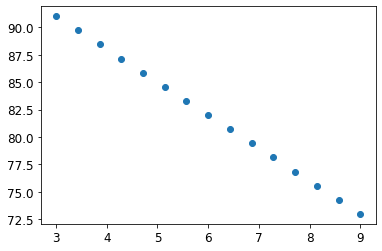

In [123]:
energy_arr = np.linspace(3,9,15)              
spectrum_arr = 100 - energy_arr * 3

plt.scatter(energy_arr, spectrum_arr)

The next line creates a file called `myspectrum.csv` and saves the content of the arrays into it.

By zipping the two arrays I'm simply writing them into the file as columns rather than lines, which makes the file easier to understand if you open it with a text editor.

In [124]:
np.savetxt("myspectrum.csv", list(zip(energy_arr, spectrum_arr)), fmt='%.3e', delimiter=',')

The next line reads the data from the file `myspectrum.csv` and loads it back into numpy arrays.

Setting `unpack=True` is a useful trick that allows me to save the two columns of the file separately into different numpy arrays, in this case called `specx` and `specy`.

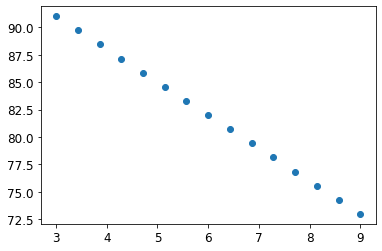

In [125]:
specx, specy = np.loadtxt("myspectrum.csv", delimiter=',', unpack=True)

plt.scatter(specx, specy)

# Random numbers with numpy

In [21]:
random_integers  = np.random.randint(400,500,15)
print(random_integers)

[462 468 498 466 493 465 423 451 407 421 485 471 441 493 461]


In [49]:
random_floats_1d = np.random.rand(15) # 1D array of random floating point 
                                      # numbers between 0 and 1.
                                      # Every time you re-run this cell,
                                      # you'll be creating a new set of 
                                      # pseudo-random numbers
print(random_floats_1d)

[0.94466892 0.52184832 0.41466194 0.26455561 0.77423369 0.45615033
 0.56843395 0.0187898  0.6176355  0.61209572 0.616934   0.94374808
 0.6818203  0.3595079  0.43703195]


In [50]:
random_floats_2d = np.random.rand(3,6) # 2D array of random floating point 
                                       # numbers between 0 and 1
print(random_floats_2d)

[[0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263 ]
 [0.31542835 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481]
 [0.20887676 0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]]


### Seeding:

To make your experiment reproducible, you may want to *seed* the random numbers you produce:

In [47]:
np.random.seed(0) # This fixes the random numbers that are produced next

random_but_predictable = np.random.rand(3,3) # If you re-run this cell, these 
                                             # values won't change
print(random_but_predictable)

[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]]


### Group activity:  

Write a function that estimates the value of $\pi$ with a Monte Carlo approach:

- First, we want to create a random set of $n$ points dixtributed randomly inside a 2x2 square, so with x- and y- coordinates between 0 and 2.
- Then we count how many of these points lie inside a circle of radius 1 centered in the middle of the square.
- Because our points are randomly distributed, the ratio between the fraction of points that lie inside the circle gives you an estimate of the ratio between the area of the circle and the total area of the square:

$$
\frac{N_\rm{inside}}{N_\rm{total}} = \frac{A_\bigodot}{A_\square} = \frac{\pi}{4}
$$

In [58]:
def approxpi(n, seed=0):
    """Estimates an approximate value of pi with a Monte Carlo approach.
    
    Args:
        n (int): number of points to scatter
        seed (int): random seed  
        
    Return:
        piapprox (float): estimate of the value of pi.
    """
    np.random.seed(seed)            # Ensures result is reproducible
    xarr = np.random.rand(n) * 2    # x coordinates
    yarr = np.random.rand(n) * 2    # y coordinates
    dist2arr = ((xarr - 1.0) ** 2 + # Distance (squared) of each point to the center
                (yarr - 1.0) ** 2
               )
    isincirc = dist2arr <= 1        # True for points in the circle, False for out
    incount = np.sum(isincirc)      # Number of points inside the circle 
                                    # (remember that True acts as 1, False as 0)
    piapprox = 4 * incount / n      
    return piapprox

print("With a million points, pi~", approxpi(1000000))

With a million points, pi~ 3.141688


# Interpolation

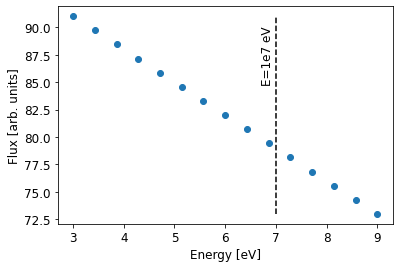

In [145]:
plt.scatter(energy_arr, spectrum_arr)
plt.vlines(7.0, np.min(spectrum_arr),
           np.max(spectrum_arr), 
           'k',ls='--')
plt.text(6.7,85,"E=1e7 eV",rotation=90,fontsize=12)
plt.xlabel("Energy [eV]",fontsize=12)
plt.ylabel("Flux [arb. units]",fontsize=12)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

Interpolation is used when I want to know the values in values that fall between my x-axis grid, like $E=10^7~\rm{eV}$ in the figure above.

In [136]:
new_energies = np.linspace(4, 8, 5) # Energy values that are different 
                                    # from the ones in my original array

interpolated_flux = np.interp(new_energies, energy_arr, spectrum_arr)

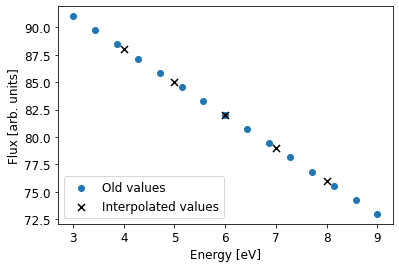

In [146]:
plt.scatter(energy_arr, 
            spectrum_arr, 
            label="Old values")
plt.scatter(new_energies,
            interpolated_flux,
            label="Interpolated values",
            c='k',s=50,marker='x') 
plt.legend(loc='lower left', fontsize=12)

plt.xlabel("Energy [eV]",fontsize=12)
plt.ylabel("Flux [arb. units]",fontsize=12)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

In [158]:
flux_at_1e7 = interpolated_flux[new_energies == 7][0]
print(f"At 1e7 eV, the model predicts a flux of {flux_at_1e7:.1f}")

At 1e7 eV, the model predicts a flux of 79.0


# Numerical integration

`np.trapz` integrates a y array over an x-array iwth the trapezoid method:

In [160]:
integ = np.trapz(spectrum_arr, energy_arr) # In this case, we divide the  
print("Area below the curve in the entire energy range:", integ)

Area below the curve in the entire energy range: 492.0


### Group activity:

A thermal source of fixed temperature $T$ radiates a spectrum whose shape is given by the Planck distribution,

$$
E^2\frac{dN}{dE} \,=\, \frac{E^4}{\exp(k_B\,T) -1},
$$

with $k_B=8.6\times10^{-5}~\rm{eV/K}$.

Take an array of energies in eV:

In [174]:
earr = np.logspace(-3,1,100) # 100 energy values logarithmically distributed
                             # between 1 meV and 10 eV

and create an array `thermal_spec` of the spectrum radiated by a source of temperature $T=500~\rm{K}$ with a total luinosity of $L=10^{45}~\rm{erg/s}$. In other words, the *shape* of your spectrum is given byt the Planck formula above, and its *normalization* is given by the condition:

$$
\int \left(E^2\frac{dN}{dE}\right) \frac{1}{E} dE \,=\, 10^{45}~\rm{erg}/\rm{s}.
$$


### Solution:

1e+45


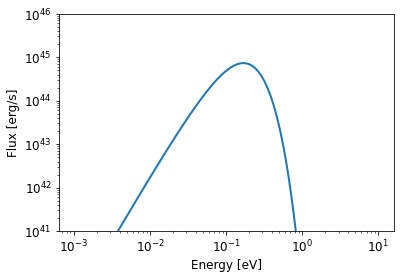

In [178]:
kbT = 500 * 8.6e-5

spec_shape = earr ** 4 / (np.exp(earr / kbT) - 1) # Spectrum that follows the Planck
                                                  # distribution, but has arbitrary
                                                  # normalization

myintegral = np.trapz(spec_shape / earr, earr) # This is the integral of the 
                                               # spectrum I created

renorm_factor =  1e45 / myintegral # This is the normalization factor necessary to
                                   # bring the integral to the required value of 
                                   # 1e45 erg/s  

thermal_spec = spec_shape * renorm_factor

print(np.trapz(thermal_spec / earr, earr)) # Check that the integrated luminosity 
                                           # is now the desired 1e45 erg/s

plt.loglog(earr, thermal_spec, lw=2)
plt.ylim([1e41,1e46])
plt.xlabel("Energy [eV]",fontsize=12)
plt.ylabel("Flux [erg/s]",fontsize=12)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
